# A Visual History of Nobel Prize Winners



The Nobel Prize is perhaps the world's most well known scientific award. Every year it is given to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace. In this project, we aim at exploring patterns and trends in over 100 years worth of Nobel Prize winners.

Specifically, we try to answer the following questions:

1. Who gets the Nobel Prize?
2. What is the gender of a typical Nobel Prize winner?
   (Males count vs. Females count)
3. Dominant country in each field?
4. USA dominance, visualized
5. Capitals dominance vs. non-capitals
6. The first woman to win the Nobel Prize
7. Organizations vs. Individuals
8. Oldest and youngest winners
9. Age differences between prize categories

The dataset we use can be found on kaggle: https://www.kaggle.com/nobelfoundation/nobel-laureates

## 1. Data Cleaning & Transformations:

We start by inspecting the data and cleaning it. We will have a look at the missing values, the noisy values and try to clean the data as much as possible. We as well will perform some transformations and pre-processing on the data so as to serve answering our target questions.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Inspecting the data
nobel_data = pd.read_csv("Data - Nobel Prize Laureates.csv")
nobel_data.sample(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
932,2014,Chemistry,The Nobel Prize in Chemistry 2014,"""for the development of super-resolved fluores...",1/3,910,Individual,Stefan W. Hell,1962-12-23,Arad,Romania,Male,German Cancer Research Center,Heidelberg,Germany,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,1955,Medicine,The Nobel Prize in Physiology or Medicine 1955,"""for his discoveries concerning the nature and...",1/1,359,Individual,Axel Hugo Theodor Theorell,1903-07-06,Linköping,Sweden,Male,"Karolinska Institutet, Nobel Medical Institute",Stockholm,Sweden,1982-08-15,Stockholm,Sweden
829,2007,Medicine,The Nobel Prize in Physiology or Medicine 2007,"""for their discoveries of principles for intro...",1/3,811,Individual,Mario R. Capecchi,1937-10-06,Verona,Italy,Male,University of Utah,"Salt Lake City, UT",United States of America,NaN,NaN,NaN
726,1999,Medicine,The Nobel Prize in Physiology or Medicine 1999,"""for the discovery that proteins have intrinsi...",1/1,461,Individual,Günter Blobel,1936-05-21,Waltersdorf (Niegoslawice),Germany (Poland),Male,Rockefeller University,"New York, NY",United States of America,NaN,NaN,NaN
512,1978,Physics,The Nobel Prize in Physics 1978,"""for their discovery of cosmic microwave backg...",1/4,112,Individual,Robert Woodrow Wilson,1936-01-10,"Houston, TX",United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,NaN,NaN,NaN
22,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the numerous and brilliant ...",1/2,574,Individual,José Echegaray y Eizaguirre,1832-04-19,Madrid,Spain,Male,NaN,NaN,NaN,1916-09-04,Madrid,Spain
903,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,882,Individual,Alvin E. Roth,1951-12-18,"New York, NY",United States of America,Male,Harvard Business School,"Boston, MA",United States of America,NaN,NaN,NaN
530,1980,Medicine,The Nobel Prize in Physiology or Medicine 1980,"""for their discoveries concerning genetically ...",1/3,419,Individual,Baruj Benacerraf,1920-10-29,Caracas,Venezuela,Male,Harvard Medical School,"Boston, MA",United States of America,2011-08-02,"Boston, MA",United States of America
949,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,923,Individual,Aziz Sancar,1946-09-08,Savur,Turkey,Male,University of North Carolina,"Chapel Hill, NC",United States of America,NaN,NaN,NaN


**Unique Values and Duplicate Records:**    
We will take a look at the number of unique values in each column and checkout the shape of the dataset. The ID column should be unique, that means that the number of rows must be the same as the number of unique values in ID column.

In [3]:
#print number of rows by number of columns
nobel_data.shape

(969, 18)

In [4]:
#print the count of unique values in each column
nobel_data.nunique()

Year                    113
Category                  6
Prize                   579
Motivation              565
Prize Share               4
Laureate ID             904
Laureate Type             2
Full Name               904
Birth Date              868
Birth City              601
Birth Country           121
Sex                       2
Organization Name       315
Organization City       186
Organization Country     29
Death Date              582
Death City              291
Death Country            50
dtype: int64

We realise there are 969 records in the data, however there are only 904 IDs. This indicates we have duplicate records that need to be eliminated. We shall use pandas' drop_duplicates method and make sure that the number of records matches the number of unique IDs then.

In [5]:
#based on the ID column, drop duplicates keeping only the first occurence
nobel_no_dup = nobel_data.drop_duplicates(subset='Laureate ID', keep='first')

#check that the number of records is now the same as the number of unique IDs
nobel_no_dup.shape

(904, 18)

**Missing Values Analysis and Imputation:**    
We will now analyze the missing values and try to derive conclusions about what are plausible values and techniques to impute with, and what values can be manually filled using the internet.

In [6]:
#Check the missing values in the dataset
# get the number of missing data points per column
missing_values = nobel_no_dup.isnull().sum()

# We want to check the percentage of the missing values.
#Therefore we get the number of missing values and number of total cells to calculate %
total_cells = np.product(nobel_no_dup.shape) 
total_missing_cells = missing_values.sum()

# percent of data that is missing
percentage_missing_values = (total_missing_cells/total_cells) * 100
percentage_missing_values = '%.2f' % percentage_missing_values
print("Missing Data Percentage: " + str(percentage_missing_values) + "%")

Missing Data Percentage: 11.54%


Having calculated the percentage of the missing data, we can't simply drop the records with missing values since the percentage exceeds the safe zone (2-3%). Therefore, further analysis of the missing values is needed. We will start by looking at the "Laureate Type" column.  


In [7]:
#check the different values in the column along with their counts
nobel_no_dup['Laureate Type'].value_counts()

Individual      877
Organization     27
Name: Laureate Type, dtype: int64

We note that there are two unique values for the "Laureate Type" column: Individual and Organization. We also note that most of the records are individuals vs, very small % which are organizations. It is particularly interesting to look at the demographics data of the organization records.

In [8]:
#get only records of type organization
org = nobel_no_dup.loc[nobel_no_dup['Laureate Type'] == "Organization"]
org

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,1965,Peace,The Nobel Peace Prize 1965,NaN,1/1,525,Organization,United Nations Children's Fund (UNICEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,1969,Peace,The Nobel Peace Prize 1969,NaN,1/1,527,Organization,International Labour Organization (I.L.O.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We note that all the organization records have NaN values for the demographic columns, except for some records such as Mother Teresa who have demographic data and were mistakenly recorded as organizations. We will identify these values and correct them. And we also decide not to impute the missing demographic values for the organization records, since it makes sense that this data is Nan, and more importantly since we don't need it in answering any of our target analysis questions indicated at the top of the notebook.

In [9]:
#identify records who are labeled as organization but have a birth date which is not nan
isOrg = nobel_no_dup['Laureate Type'] == "Organization"
isBD = pd.notna(nobel_no_dup['Birth Date'])
mask = isOrg & isBD

#change the laureate type of these records to be individual
#run twice to suppress the warning
#nobel_no_dup.loc[ mask, 'Laureate Type'] = "Individual"

df = nobel_no_dup.loc[mask].copy()
df['Laureate Type'] = "Individual"
nobel1 = nobel_no_dup.drop(nobel_no_dup.loc[ mask].index, axis=0)
nobel1 = pd.concat([nobel1, df], axis=0)
nobel1.shape

(904, 18)

Now we check records which are labeled organization, and expect all of them to be actual organizations.

In [10]:
#get only records of type organization
org = nobel1.loc[nobel1['Laureate Type'] == "Organization"]
org

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,1965,Peace,The Nobel Peace Prize 1965,NaN,1/1,525,Organization,United Nations Children's Fund (UNICEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,1969,Peace,The Nobel Peace Prize 1969,NaN,1/1,527,Organization,International Labour Organization (I.L.O.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also check records which are labeled as organization but have a birth date, and expect that none exist anymore.

In [11]:
isOrg = nobel1['Laureate Type'] == "Organization"
isBD = pd.notna(nobel1['Birth Date'])
mask = isOrg & isBD
nobel1.loc[isOrg & isBD]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country


Now all is good concerning the organizations. Now we want to analyze the individuals and their missing values. First, we group only the individual records, then display the count of missing values in each column.

In [12]:
#get only records of type individual
ind = nobel1.loc[nobel1['Laureate Type'] == "Individual"]
ind.sample(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
119,1924,Literature,The Nobel Prize in Literature 1924,"""for his great national epic, <I>The Peasants<...",1/1,594,Individual,Wladyslaw Stanislaw Reymont,1867-05-07,Kobiele Wielkie,Russian Empire (Poland),Male,NaN,NaN,NaN,1925-12-05,Warsaw,Poland
88,1917,Literature,The Nobel Prize in Literature 1917,"""for his varied and rich poetry, which is insp...",1/2,586,Individual,Karl Adolph Gjellerup,1857-06-02,Roholte,Denmark,Male,NaN,NaN,NaN,1919-10-11,Klotzsche,Germany
404,1968,Medicine,The Nobel Prize in Physiology or Medicine 1968,"""for their interpretation of the genetic code ...",1/3,389,Individual,Har Gobind Khorana,1922-01-09,Raipur,India,Male,University of Wisconsin,"Madison, WI",United States of America,2011-11-09,"Concord, MA",United States of America
628,1990,Literature,The Nobel Prize in Literature 1990,"""for impassioned writing with wide horizons, c...",1/1,667,Individual,Octavio Paz,1914-03-31,Mexico City,Mexico,Male,NaN,NaN,NaN,1998-04-19,Mexico City,Mexico
503,1978,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his pioneering research into the decision...",1/1,691,Individual,Herbert A. Simon,1916-06-15,"Milwaukee, WI",United States of America,Male,Carnegie Mellon University,"Pittsburgh, PA",United States of America,2001-02-09,"Pittsburgh, PA",United States of America
674,1995,Chemistry,The Nobel Prize in Chemistry 1995,"""for their work in atmospheric chemistry, part...",1/3,282,Individual,Mario J. Molina,1943-03-19,Mexico City,Mexico,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaN,NaN,NaN
373,1964,Medicine,The Nobel Prize in Physiology or Medicine 1964,"""for their discoveries concerning the mechanis...",1/2,379,Individual,Feodor Lynen,1911-04-06,Munich,Germany,Male,Max-Planck-Institut für Zellchemie,Munich,Federal Republic of Germany,1979-08-06,Munich,Germany
838,2008,Chemistry,The Nobel Prize in Chemistry 2008,"""for the discovery and development of the gree...",1/3,829,Individual,Osamu Shimomura,1928-08-27,Kyoto,Japan,Male,Marine Biological Laboratory (MBL),"Woods Hole, MA",United States of America,NaN,NaN,NaN
499,1977,Physics,The Nobel Prize in Physics 1977,"""for their fundamental theoretical investigati...",1/3,107,Individual,Philip Warren Anderson,1923-12-13,"Indianapolis, IN",United States of America,Male,Bell Telephone Laboratories,"Murray Hill, NJ",United States of America,NaN,NaN,NaN
414,1969,Medicine,The Nobel Prize in Physiology or Medicine 1969,"""for their discoveries concerning the replicat...",1/3,392,Individual,Alfred D. Hershey,1908-12-04,"Owosso, MI",United States of America,Male,Carnegie Institution of Washington,"Long Island, New York, NY",United States of America,1997-05-22,"Syosset, NY",United States of America


In [13]:
#get missing values count in individual records
ind_missing_values = ind.isnull().sum()
ind_missing_values

Year                      0
Category                  0
Prize                     0
Motivation               71
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                2
Birth City                2
Birth Country             0
Sex                       0
Organization Name       220
Organization City       218
Organization Country    218
Death Date              292
Death City              309
Death Country           303
dtype: int64

Now we observe very interesting patterns in our data. We note that the birth date and the birth country have only two missing values which we can identify and fill manually.  
We also note that we have large number of missing values for the organization name, organization city and organization country. This is most probably due to some individuals not belonging to any organization like Naguib Mahfouz for example. We also note that there exists large number of missing values for death date, death city and death country. This is probably due to some people being still alive.    
Since the death dates and the organizations don't matter much to our proposed question, we decide to keep them as NaNs since this is normal: if someone didn't die yet, his death date is not a missing value, the record can still be considered complete then.   
We focus however on identifying the 2 missing values for "Birth Date" and "Birth City", since they are important to our analysis.

In [14]:
#get records who are individuals and their birth city is NaN
isInd = nobel1['Laureate Type'] == "Individual"
isCityNan = pd.isna(nobel1['Birth City'])

nobel1.loc[isInd & isCityNan]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
750,2001,Literature,The Nobel Prize in Literature 2001,"""for having united perceptive narrative and in...",1/1,747,Individual,Sir Vidiadhar Surajprasad Naipaul,1932-08-17,NaN,Trinidad,Male,NaN,NaN,NaN,NaN,NaN,NaN
880,2010,Peace,The Nobel Peace Prize 2010,"""for his long and non-violent struggle for fun...",1/1,855,Individual,Liu Xiaobo,1955-12-28,NaN,China,Male,NaN,NaN,NaN,NaN,NaN,NaN


Now that we identified the 2 records whose birth city is Nan, we fill them up manually. Using the internet we get that the birth city of Sir Vidiadhar Surajprasad Naipaul is Chaguanas, and the birth city of Liu Xiaobo is Changchun. We fill them out manually.

In [15]:
nobel1.loc[nobel1['Full Name'] == "Sir Vidiadhar Surajprasad Naipaul", 'Birth City'] = "Chaguanas"
nobel1.loc[nobel1['Full Name'] == "Liu Xiaobo", 'Birth City'] = "Changchun"


In [16]:
#get records who are individuals and their birth date is NaN
isInd = nobel1['Laureate Type'] == "Individual"
isBDNan = pd.isna(nobel1['Birth Date'])

nobel1.loc[isInd & isBDNan]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
853,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,NaN,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
894,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN


Also using the internet we get that the birth date of Venkatraman Ramakrishnan is 1 April 1952, and the birth date of Saul Perlmutter is 22 September 1959. We as well fill them manually. We first however inspect the type of the date column.

In [17]:
nobel1.loc[nobel1['Full Name'] == "Venkatraman Ramakrishnan", 'Birth Date'] = '1952-1-4'
nobel1.loc[nobel1['Full Name'] == "Saul Perlmutter", 'Birth Date'] = '1959-22-9'


Now we check the missing values in individuals. We expect not to have any missing values in birth date and birth city.

In [18]:
ind = nobel1.loc[nobel1['Laureate Type'] == "Individual"]
#get missing values count in individual records
ind_missing_values = ind.isnull().sum()
ind_missing_values

Year                      0
Category                  0
Prize                     0
Motivation               71
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                0
Birth City                0
Birth Country             0
Sex                       0
Organization Name       220
Organization City       218
Organization Country    218
Death Date              292
Death City              309
Death Country           303
dtype: int64

As for the motivation column, we need it to get insights about who gets the nobel prize (see our analysis questions at the top of the notebook), we might get the most repeated words for this task or something similar. For this, we don't need all the values to be there and we also find it infeasible to manually fill them or to impute them with the most frequent value (since they are non numeric), therefore we keep this column as it is and later on see how we can benefit from it. 

Now since our target questions requires some answers about the age of the individuals when they accquired the prize, we find it beneficial to add an age column using the birth date and the year of the prize. We first check the type of the date column, and try to extract the year from it.

In [19]:
#check the data type of each column
nobel1.dtypes

Year                     int64
Category                object
Prize                   object
Motivation              object
Prize Share             object
Laureate ID              int64
Laureate Type           object
Full Name               object
Birth Date              object
Birth City              object
Birth Country           object
Sex                     object
Organization Name       object
Organization City       object
Organization Country    object
Death Date              object
Death City              object
Death Country           object
dtype: object

We notice that the "Birth Date" column is of type string instead of type datetime, therefore we try to typecast it using pandas' to_datetime

In [20]:
#nobel1['Birth Date'] = pd.to_datetime(nobel1['Birth Date'])

#when running the commented line above we get this error:
#ValueError: month must be in 1..12


The above error means that the dates are having inconsistent format. Since we are only interested in the year, we perform string manipulation in order to extract the year, then parse it into an integer. We will then subtract the prize date from the birth date to accquire the age column that we need.

In [21]:
#get organization records alone
org = nobel1.loc[nobel1['Laureate Type'] == "Organization"]
#get individual records alone
ind = nobel1.loc[nobel1['Laureate Type'] == "Individual"]

#split the date using "-" and store the result in 3 columns in a new dataframe df
df = pd.DataFrame()
df[ ['1','2','3'] ] = ind['Birth Date'].str.split("-", expand=True)
#the year is stored in the first column
df['Birth Year'] = df['1']
#drop 1,2,3 and keep year only
df = df.drop(['1', '2', '3'], axis=1)

#Now we make sure that the year is assigned correctly
#we do this by trying to print all values of Birth Year whose length is not =4, this should be false
df.loc[df['Birth Year'].str.len() != 4]

,Birth Year


Now that we extracted the year correctly, we proceed to modifying the ind dataframe and the org accordingly, and concatenate them.

In [22]:
#concat the year to the ind dataframe 

ind = pd.concat([ ind.iloc[: , 0:11], df, ind.iloc[: , 11:] ], axis=1)
ind['Birth Year'] = ind['Birth Year'].astype(int)

#calculate the age as the difference between year of prize and birth year
ind['Age'] = ind['Year'] - ind['Birth Year']

#add a zero value for the age of organization records so as to concatenate both into integers
#org.insert(0, 'Age', 0)

#we won't add zero for the age of organization and prefer to keep it as Nan and keep the birth year as float instead

#form the nobel_no_dup as the concatentation of the modified ind and the ord
nobel2 = pd.concat([ind,org], axis=0, sort=False)

#reorder the columns, make age with birth year
cols = nobel2.columns.tolist()
cols_ord = cols[0:12] + cols[19:20] + cols[12:19]
nobel3 = nobel2[cols_ord] 
nobel3

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,1852.0,49.0,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,1839.0,62.0,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),1854.0,47.0,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,1828.0,73.0,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,1822.0,79.0,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,2006,Peace,The Nobel Peace Prize 2006,"""for their efforts to create economic and soci...",1/2,810,Organization,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,2007,Peace,The Nobel Peace Prize 2007,"""for their efforts to build up and disseminate...",1/2,818,Organization,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,881,Organization,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,Organization,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now examining the "Laureate Type" column, it has only two values: Individual and Organization. Therefore we find it convenient to encode it into binary integers (0/1) in order to make it easier to handle.

In [23]:
nobel3["Laureate Type"] = nobel3["Laureate Type"].astype('category')
nobel3["Laureate Type"] = nobel3["Laureate Type"].cat.codes
nobel3

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,0,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,1852.0,49.0,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,0,Sully Prudhomme,1839-03-16,Paris,France,1839.0,62.0,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,0,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),1854.0,47.0,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,0,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,1828.0,73.0,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,0,Frédéric Passy,1822-05-20,Paris,France,1822.0,79.0,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,2006,Peace,The Nobel Peace Prize 2006,"""for their efforts to create economic and soci...",1/2,810,1,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,2007,Peace,The Nobel Peace Prize 2007,"""for their efforts to build up and disseminate...",1/2,818,1,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,881,1,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,1,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We try to encode the "Sex" column as well, it consists of only 2 values: Male and Female. The problem is there is Nan values in this column for the organization records. Therefore we make a dictionary and map the values instead of using .cat.codes.

In [24]:
#create the dictionary
dict = {'Male' : 0, 'Female' : 1} 

#convert it into categorical
nobel3["Sex"] = nobel3["Sex"].astype('category')  

#Remap the values of the dataframe 
nobel3["Sex"] = nobel3["Sex"].map(dict)

nobel3.sample(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
299,1955,Chemistry,The Nobel Prize in Chemistry 1955,"""for his work on biochemically important sulph...",1/1,218,0,Vincent du Vigneaud,1901-05-18,"Chicago, IL",United States of America,1901.0,54.0,0,Cornell University,"Ithaca, NY",United States of America,1978-12-11,"White Plains, NY",United States of America
419,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,679,0,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,1915.0,55.0,0,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,2009-12-13,"Belmont, MA",United States of America
874,2010,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analysis of markets with search fri...",1/3,856,0,Peter A. Diamond,1940-04-29,"New York, NY",United States of America,1940.0,70.0,0,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaN,NaN,NaN
418,1970,Chemistry,The Nobel Prize in Chemistry 1970,"""for his discovery of sugar nucleotides and th...",1/1,239,0,Luis F. Leloir,1906-09-06,Paris,France,1906.0,64.0,0,Institute for Biochemical Research,Buenos Aires,Argentina,1987-12-02,Buenos Aires,Argentina
159,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,0,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",Germany (Poland),1884.0,47.0,0,University of Heidelberg,Heidelberg,Germany,1949-03-30,Buenos Aires,Argentina
857,2009,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for her analysis of economic governance, espe...",1/2,846,0,Elinor Ostrom,1933-08-07,"Los Angeles, CA",United States of America,1933.0,76.0,1,Indiana University,"Bloomington, IN",United States of America,2012-06-12,"Bloomington, IN",United States of America
585,1986,Medicine,The Nobel Prize in Physiology or Medicine 1986,"""for their discoveries of growth factors""",1/2,434,0,Stanley Cohen,1922-11-17,"Brooklyn, NY",United States of America,1922.0,64.0,0,Vanderbilt University School of Medicine,"Nashville, TN",United States of America,NaN,NaN,NaN
88,1917,Literature,The Nobel Prize in Literature 1917,"""for his varied and rich poetry, which is insp...",1/2,586,0,Karl Adolph Gjellerup,1857-06-02,Roholte,Denmark,1857.0,60.0,0,NaN,NaN,NaN,1919-10-11,Klotzsche,Germany
566,1984,Medicine,The Nobel Prize in Physiology or Medicine 1984,"""for theories concerning the specificity in de...",1/3,429,0,Niels K. Jerne,1911-12-23,London,United Kingdom,1911.0,73.0,0,Basel Institute for Immunology,Basel,Switzerland,1994-10-07,Castillon-du-Gard,France
67,1911,Peace,The Nobel Peace Prize 1911,NaN,1/2,479,0,Alfred Hermann Fried,1864-11-11,Vienna,Austria,1864.0,47.0,0,NaN,NaN,NaN,1921-05-05,Vienna,Austria


For the "Category" column, we will examine its unique values and see what we can do with them:

In [25]:
nobel3['Category'].value_counts()

Medicine      211
Physics       203
Chemistry     173
Peace         126
Literature    113
Economics      78
Name: Category, dtype: int64

We notice that we have only 6 different values. We will try to encode them in order to get rid of the strings. Since there is no notion of ordering among the values, encoding them into numeric values seems to be a bad idea. Instead, we use one hot encoding.

In [26]:
#first we label them using numerical encoding

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

nobel3['Category'] = labelEncoder.fit_transform(nobel3['Category'])

nobel3.sample(10)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
379,1965,2,The Nobel Prize in Literature 1965,"""for the artistic power and integrity with whi...",1/1,638,0,Mikhail Aleksandrovich Sholokhov,1905-05-24,Veshenskaya,Russia,1905.0,60.0,0,NaN,NaN,NaN,1984-02-21,Veshenskaya,Union of Soviet Socialist Republics
231,1946,0,The Nobel Prize in Chemistry 1946,"""for his discovery that enzymes can be crystal...",1/2,204,0,James Batcheller Sumner,1887-11-19,"Canton, MA",United States of America,1887.0,59.0,0,Cornell University,"Ithaca, NY",United States of America,1955-08-12,"Buffalo, NY",United States of America
288,1953,5,The Nobel Prize in Physics 1953,"""for his demonstration of the phase contrast m...",1/1,60,0,Frits Zernike,1888-07-16,Amsterdam,Netherlands,1888.0,65.0,0,Groningen University,Groningen,Netherlands,1966-03-10,Groningen,Netherlands
799,2005,0,The Nobel Prize in Chemistry 2005,"""for the development of the metathesis method ...",1/3,794,0,Yves Chauvin,1930-10-10,Menin,Belgium,1930.0,75.0,0,Institut Français du Pétrole,Rueil-Malmaison,France,2015-01-27,Tours,France
299,1955,0,The Nobel Prize in Chemistry 1955,"""for his work on biochemically important sulph...",1/1,218,0,Vincent du Vigneaud,1901-05-18,"Chicago, IL",United States of America,1901.0,54.0,0,Cornell University,"Ithaca, NY",United States of America,1978-12-11,"White Plains, NY",United States of America
257,1949,5,The Nobel Prize in Physics 1949,"""for his prediction of the existence of mesons...",1/1,54,0,Hideki Yukawa,1907-01-23,Tokyo,Japan,1907.0,42.0,0,Kyoto Imperial University,Kyoto,Japan,1981-09-08,Kyoto,Japan
951,2015,2,The Nobel Prize in Literature 2015,"""for her polyphonic writings, a monument to su...",1/1,924,0,Svetlana Alexievich,1948-05-31,Ivano-Frankivsk,Ukraine,1948.0,67.0,1,NaN,NaN,NaN,NaN,NaN,NaN
233,1946,0,The Nobel Prize in Chemistry 1946,"""for their preparation of enzymes and virus pr...",1/4,206,0,Wendell Meredith Stanley,1904-08-16,"Ridgeville, IN",United States of America,1904.0,42.0,0,Rockefeller Institute for Medical Research,"Princeton, NJ",United States of America,1971-06-15,Salamanca,Spain
631,1990,4,The Nobel Peace Prize 1990,"""for his leading role in the peace process whi...",1/1,552,0,Mikhail Sergeyevich Gorbachev,1931-03-02,Privolnoye,Union of Soviet Socialist Republics (Russia),1931.0,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN
904,2012,1,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,0,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",United States of America,1923.0,89.0,0,University of California,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America


In [27]:
#We notice that the encoding is as follows:
# 0=Chemistry, 1=Economics, 2=Literature, 3=Medicine, 4=Peace, 5=Physics

#Now we proceed to transforming the encoding into one hot

from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()
oh = oneHotEncoder.fit_transform(nobel3['Category'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(oh, columns = ["Chemistry", "Economics", "Literature", "Medicine", "Peace", "Physics"])
df = pd.get_dummies(dfOneHot)

nobel3.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

nobel4 = pd.concat([nobel3, df], axis=1)

nobel4.sample(5)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Country,Death Date,Death City,Death Country,Chemistry,Economics,Literature,Medicine,Peace,Physics
526,1984,3,The Nobel Prize in Physiology or Medicine 1984,"""for theories concerning the specificity in de...",1/3,429,0,Niels K. Jerne,1911-12-23,London,...,Switzerland,1994-10-07,Castillon-du-Gard,France,0.0,0.0,0.0,1.0,0.0,0.0
190,1937,4,The Nobel Peace Prize 1937,NaN,1/1,502,0,"Cecil of Chelwood, Viscount (Lord Edgar Algern...",1864-09-14,London,...,NaN,1958-11-24,Tunbridge Wells,United Kingdom,0.0,0.0,0.0,0.0,1.0,0.0
277,1955,0,The Nobel Prize in Chemistry 1955,"""for his work on biochemically important sulph...",1/1,218,0,Vincent du Vigneaud,1901-05-18,"Chicago, IL",...,United States of America,1978-12-11,"White Plains, NY",United States of America,1.0,0.0,0.0,0.0,0.0,0.0
214,1945,3,The Nobel Prize in Physiology or Medicine 1945,"""for the discovery of penicillin and its curat...",1/3,340,0,Ernst Boris Chain,1906-06-19,Berlin,...,United Kingdom,1979-08-12,Mulrany,Ireland,0.0,0.0,0.0,1.0,0.0,0.0
188,1937,2,The Nobel Prize in Literature 1937,"""for the artistic power and truth with which h...",1/1,609,0,Roger Martin du Gard,1881-03-23,Neuilly-sur-Seine,...,NaN,1958-08-22,Bellême,France,0.0,0.0,1.0,0.0,0.0,0.0


We now turn to the Prize share column, we check if there are any null values, and try to encode it since previously we saw it is of type object. First we parse the string to encode it into numeric value. Then we do the one hot encoding.

In [28]:
nobel4['Prize Share'].isnull().sum()

0

Since there are no null values, we proceed to splitting it using the "/" and encode it into numeric values. We want to find wether the share is always 1/something. If so, we parse it to discard the 1 and keep the number, where our encoding now means that if for example the value of prize share is 3, it implicitly means 1/3. 

In [29]:
#split the date using "/" and store the result in 2 columns in a new dataframe df
df = pd.DataFrame()
df[ ['1','Prize Share'] ] =  nobel4['Prize Share'].str.split("/", expand=True)

#display the part before "/"
df['1'] = df['1'].astype(int)
df['1'].sum()


904

Now since the part before "/" is actually always 1 (sum is 904 = number of records), we proceed with encoding the column.

In [30]:
#drop 1 and keep Prize Share only
df = df.drop(['1'], axis=1)

#drop the old prize share column from the dataframe
nobel4 = nobel4.drop(['Prize Share'], axis=1)

#concat the new prize share column to the dataframe
nobel5 = pd.concat([nobel4, df], axis=1)

#convert it into int
nobel5['Prize Share'] = nobel5['Prize Share'].astype(int)

#now 1 means 1/1, 2 means 1/2, 3 means 1/3 and 4 means 1/4
nobel5.head(5)

,Year,Category,Prize,Motivation,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,...,Death Date,Death City,Death Country,Chemistry,Economics,Literature,Medicine,Peace,Physics,Prize Share
0,1901,0,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",160,0,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,...,1911-03-01,Berlin,Germany,1.0,0.0,0.0,0.0,0.0,0.0,1
1,1901,2,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",569,0,Sully Prudhomme,1839-03-16,Paris,France,...,1907-09-07,Châtenay,France,0.0,0.0,1.0,0.0,0.0,0.0,1
2,1901,3,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",293,0,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),...,1917-03-31,Marburg,Germany,0.0,0.0,0.0,1.0,0.0,0.0,1
3,1901,4,The Nobel Peace Prize 1901,NaN,462,0,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,...,1910-10-30,Heiden,Switzerland,0.0,0.0,0.0,0.0,1.0,0.0,2
4,1901,4,The Nobel Peace Prize 1901,NaN,463,0,Frédéric Passy,1822-05-20,Paris,France,...,1912-06-12,Paris,France,0.0,0.0,0.0,0.0,1.0,0.0,2


In [31]:
#Now we proceed to transforming the encoding into one hot

from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()
oh = oneHotEncoder.fit_transform(nobel5['Prize Share'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(oh, columns = ["Share 1/1", "Share 1/2", "Share 1/3", "Share 1/4"])
df = pd.get_dummies(dfOneHot)

nobel5.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

nobel6 = pd.concat([nobel5, df], axis=1)
nobel6.sample(10)

,Year,Category,Prize,Motivation,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,...,Economics,Literature,Medicine,Peace,Physics,Prize Share,Share 1/1,Share 1/2,Share 1/3,Share 1/4
888,1963,4,The Nobel Peace Prize 1963,NaN,523,1,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0
729,2003,5,The Nobel Prize in Physics 2003,"""for pioneering contributions to the theory of...",768,0,Anthony J. Leggett,1938-03-26,London,United Kingdom,...,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,1.0,0.0
702,2001,4,The Nobel Peace Prize 2001,"""for their work for a better organized and mor...",749,0,Kofi Annan,1938-04-08,Kumasi,Gold Coast (Ghana),...,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0
641,1996,1,The Sveriges Riksbank Prize in Economic Scienc...,"""for their fundamental contributions to the ec...",716,0,William Vickrey,1914-06-21,"Victoria, BC",Canada,...,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0.0,0.0
282,1956,0,The Nobel Prize in Chemistry 1956,"""for their researches into the mechanism of ch...",219,0,Sir Cyril Norman Hinshelwood,1897-05-19,London,United Kingdom,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0.0,0.0
458,1977,1,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pathbreaking contribution to the th...",690,0,James E. Meade,1907-06-23,Swanage,United Kingdom,...,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0.0,0.0
194,1938,2,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",610,0,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,...,0.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
624,1994,5,The Nobel Prize in Physics 1994,"""for pioneering contributions to the developme...",145,0,Bertram N. Brockhouse,1918-07-15,"Lethbridge, Alberta",Canada,...,0.0,0.0,0.0,0.0,1.0,2,0.0,1.0,0.0,0.0
800,2010,0,The Nobel Prize in Chemistry 2010,"""for palladium-catalyzed cross couplings in or...",853,0,Akira Suzuki,1930-09-12,Mukawa,Japan,...,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,1.0,0.0
497,1981,0,The Nobel Prize in Chemistry 1981,"""for their theories, developed independently, ...",257,0,Kenichi Fukui,1918-10-04,Nara,Japan,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0.0,0.0


In [32]:
#drop the columns we don't need
nobel_cleaned = nobel6.drop(['Prize Share', 'Category', 'Prize', 'Birth Date', 'Death Date', 'Death Country', 'Death City'], axis=1)
nobel_cleaned.sample(10)

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
473,1978,NaN,539,0,Menachem Begin,Brest Litovsk,Russian Empire (Belarus),1913.0,65.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
506,1981,"""for his contribution to the development of hi...",120,0,Kai M. Siegbahn,Lund,Sweden,1918.0,63.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
235,1948,"""for his development of the Wilson cloud chamb...",53,0,Patrick Maynard Stuart Blackett,London,United Kingdom,1897.0,51.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
839,2013,"""for their discoveries of machinery regulating...",885,0,Randy W. Schekman,"St. Paul, MN",United States of America,1948.0,65.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
773,2008,"""for the discovery and development of the gree...",829,0,Osamu Shimomura,Kyoto,Japan,1928.0,80.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
882,1910,NaN,477,1,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
668,1998,"""for their efforts to find a peaceful solution...",566,0,John Hume,Londonderry,Northern Ireland,1937.0,61.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
213,1945,"""for the discovery of penicillin and its curat...",339,0,Sir Alexander Fleming,Lochfield,Scotland,1881.0,64.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
558,1987,"""for their important break-through in the disc...",131,0,K. Alexander Müller,Basel,Switzerland,1927.0,60.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
152,1931,"""in recognition of their contributions to the ...",189,0,Carl Bosch,Cologne,Germany,1874.0,57.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
nobel_cleaned.to_csv('nobel_data_cleaned.csv', index= None) 

### 2. Data Visualization:    

Now that we are done with cleaning our data we proceed to creating the visualizations and answering our target questions

Firstly, we would like to examine the average age of a nobel prize winner within each field. We start by getting the subset of the dataframe which contains individuals only (since we are interested in the age now), them grouping the resulting dataframe according to the field. Within each field we get the average age.
 

In [34]:
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

phys = ind.loc[nobel_cleaned['Physics'] == 1]
chem = ind.loc[nobel_cleaned['Chemistry'] == 1]
econ = ind.loc[nobel_cleaned['Economics'] == 1]
liter = ind.loc[nobel_cleaned['Literature'] == 1]
med = ind.loc[nobel_cleaned['Medicine'] == 1]
peace = ind.loc[nobel_cleaned['Peace'] == 1]


phys_avg_age = (phys['Age'].sum() / phys.shape[0]).astype(int)
chem_avg_age = (chem['Age'].sum() / chem.shape[0]).astype(int)
econ_avg_age = (econ['Age'].sum() / econ.shape[0]).astype(int)
liter_avg_age = (liter['Age'].sum() / liter.shape[0]).astype(int)
med_avg_age = (med['Age'].sum() / med.shape[0]).astype(int)
peace_avg_age = (peace['Age'].sum() / peace.shape[0]).astype(int)



Now we plot the field vs. avg age as a bar chart.

In [35]:
avg_age = [('Physics',phys_avg_age), ('Chemistry', chem_avg_age), ('Economics', econ_avg_age), 
           ('Literature', liter_avg_age), ('Medicine', med_avg_age), ('Peace', peace_avg_age)] 

avg_age_dist = pd.DataFrame(avg_age,columns=['Field', 'Average Age'])

avg_age_dist = avg_age_dist.set_index('Field')
avg_age_dist.plot.bar(rot=45)

Next we would like to investigate who is the first woman to be awarded the nobel prize. And in what year was that, and in what particular field.


In [36]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

#then we get females only.
females = ind[ind['Sex'] == 1]

#then we get lowest year
min_year = females['Year'].min()
first_female = females.loc[females['Year'] == min_year]
first_female

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
19,1903,"""in recognition of the extraordinary services ...",6,0,"Marie Curie, née Sklodowska",Warsaw,Russian Empire (Poland),1867.0,36.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


We figure out it's Marie Curie in 1903 at the age of 36 in physics, in recognition of her work on the physiology of digestion, through which knowledge on vital aspects of the subject has been transformed and enlarged.

We next proceed to answer the question of who are the youngest and oldest winners. Starting with the youngest:

In [37]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

min_age = ind['Age'].min()
youngest_winner = ind.loc[ind['Age'] == min_age]

youngest_winner

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
852,2014,"""for their struggle against the suppression of...",914,0,Malala Yousafzai,Mingora,Pakistan,1997.0,17.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


The youngest winner was Malala Yousafzai from Pakistan at the age of 17. She was awarded Nobel prize for peace for her struggle against the suppression of children and young people and for the right of all children to education.    
We next search for the oldest winner:

In [38]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

max_age = ind['Age'].max()
oldest_winner = ind.loc[ind['Age'] == max_age]

oldest_winner

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
763,2007,"""for having laid the foundations of mechanism ...",820,0,Leonid Hurwicz,Moscow,Russia,1917.0,90.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The oldest winner was Leonid Hurwicz at the age of 90. He was awarded Nobel prize for Economics for having laid the foundations of mechanism design theory.

Following our aim to answer all the 10 questions, We had to inspect the Motivation column to find the most frequent words. This will give us some insights on what people mostly do to win a nobel prize.

In [39]:
from collections import Counter

#We seperate the Motivation column in a seperate Dataframe
Motivation_column = nobel_cleaned["Motivation"]

#We drop all the rows which holds null values
Motivation_column  = Motivation_column.dropna(how='any',axis=0) 

# Then w apply Method counter that results in an array, at which each instance of that array includes
# a word and counter for each repetition for it.
common_words = Counter('"'.join(Motivation_column.str.lower()).split()).most_common(100)
common_words

[('of', 1100),
 ('the', 1029),
 ('and', 508),
 ('their', 339),
 ('his', 324),
 ('in', 323),
 ('to', 192),
 ('discovery', 187),
 ('for', 157),
 ('discoveries', 154),
 ('concerning', 116),
 ('a', 113),
 ('on', 99),
 ('development', 92),
 ('with', 85),
 ('work', 83),
 ('which', 82),
 ('by', 75),
 ('contributions', 56),
 ('has', 54),
 ('theory', 52),
 ('recognition', 48),
 ('structure', 48),
 ('chemical', 43),
 ('economic', 42),
 ('that', 38),
 ('new', 37),
 ('pioneering', 37),
 ('fundamental', 33),
 ('he', 31),
 ('human', 31),
 ('studies', 30),
 ('its', 29),
 ('analysis', 29),
 ('especially', 28),
 ('methods', 26),
 ('an', 24),
 ('through', 24),
 ('investigations', 24),
 ('research', 22),
 ('as', 22),
 ('genetic', 22),
 ('into', 21),
 ('her', 20),
 ('cell', 20),
 ('invention', 20),
 ('mechanism', 20),
 ('important', 19),
 ('method', 19),
 ('organic', 18),
 ('nuclear', 18),
 ('having', 18),
 ('efforts', 18),
 ('services', 17),
 ('our', 17),
 ('atomic', 17),
 ('elementary', 17),
 ('quantum'

As you can see here, There are a lot of stop words that is repeated in the Motivation column, which is normal, but we need to eliminate all these stop words in order to concentrate more on important words
that will affect our decisions. So we are going to import "nltk" library that includes a lot of dictionaries and words.

In [40]:
#in order to include stopwords in our code we had to use nltk.download() which will open a window for us,
#from which we can use stopwords to download 

# nltk.download()
import nltk
from nltk.corpus import stopwords

#By trial and error, we found that the process of eliminating the stop words from our data
#needs to be done 3 times at least to get rid of all stop words
for i in range(0,3):
    for word in common_words:
        if word[0] in (stopwords.words('english')):
            common_words.remove(word)
common_words

ModuleNotFoundError: No module named 'nltk'

Now our data is clean, we can start follow the process of visualizing It to find the most frequent words

In [41]:
#We created a dataframe that holds the word and its frequency in 2 separate columns

Most_frequent = pd.DataFrame(common_words,columns=['Word', 'Frequency'])

We don't need all these data now, as we are only searching for the most frequents words, so the first 10 elements are enough

In [42]:
Most_frequent = Most_frequent.head(10)
Most_frequent

,Word,Frequency
0,of,1100
1,the,1029
2,and,508
3,their,339
4,his,324
5,in,323
6,to,192
7,discovery,187
8,for,157
9,discoveries,154


             Frequency
Word                  
of                1100
the               1029
and                508
their              339
his                324
in                 323
to                 192
discovery          187
for                157
discoveries        154


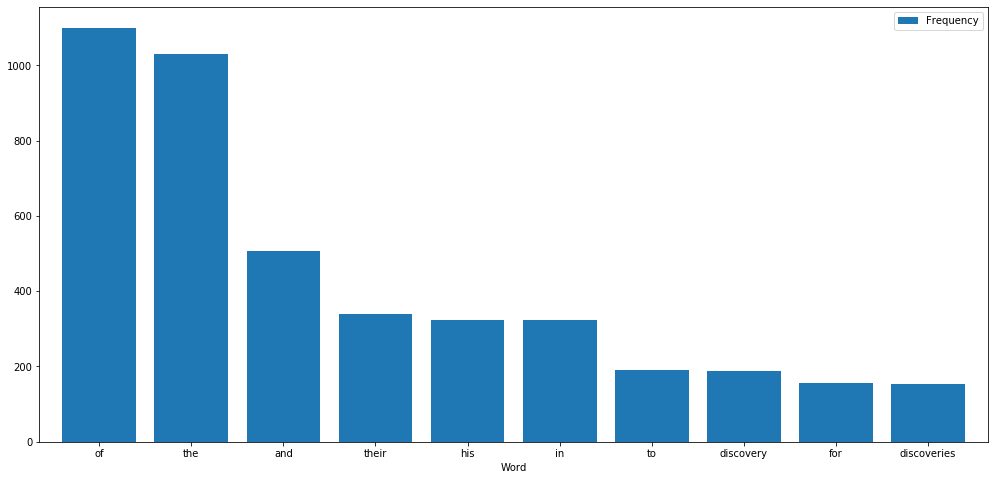

In [43]:
#We removed the index column and set the Word column to be the index, in order to make the visualization more clear.

Most_frequent = Most_frequent[Most_frequent.Word != '"'].reset_index()
del Most_frequent['index']
Most_frequent = Most_frequent.set_index('Word')
print(Most_frequent)
Most_frequent.plot.bar(rot=0, figsize=(17,8), width=0.8)

Here is a comparison between number of winners working with an organisation vs number of winners not working with an organisation

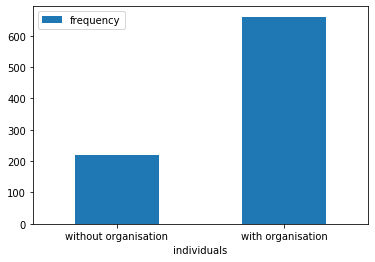

In [44]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

#then we get individuals with no organsiation.
ind_No_organisation = ind['Organization Name'].isnull().sum()

#then we get individuals with organsiation.
ind_organisation = ind[ind['Organization Name'] != 'NaN']
c1=ind_No_organisation
c2=ind_organisation['Organization Name'].count()
#plot the bar chart
df = pd.DataFrame({'individuals':['without organisation', 'with organisation'], 'frequency':[c1, c2]})
df.plot.bar(x='individuals', y='frequency', rot=0)

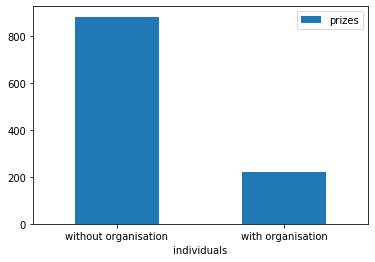

In [45]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

#then we get individuals with no organsiation.
ind_No_organisation = ind[ind['Organization Name'].isnull()]

#then we get individuals with organsiation.
ind_organisation = ind[ind['Organization Name'] != 'NaN']
c1=ind_organisation["Physics"].sum()+ind_organisation["Economics"].sum()+ind_organisation["Chemistry"].sum()+ind_organisation["Literature"].sum()+ind_organisation["Medicine"].sum()+ind_organisation["Peace"].sum()     
c2=ind_No_organisation["Physics"].sum()+ind_No_organisation["Economics"].sum()+ind_No_organisation["Chemistry"].sum()+ind_No_organisation["Literature"].sum()+ind_No_organisation["Medicine"].sum()+ind_No_organisation["Peace"].sum()  
#plot the bar chart
df = pd.DataFrame({'individuals':['without organisation', 'with organisation'], 'prizes':[c1, c2]})
df.plot.bar(x='individuals', y='prizes', rot=0)

In the first line, we get the physics award winners,
then we get the counts depdening on the birth country
finally the graph is plotted.
This process is repeated for each field

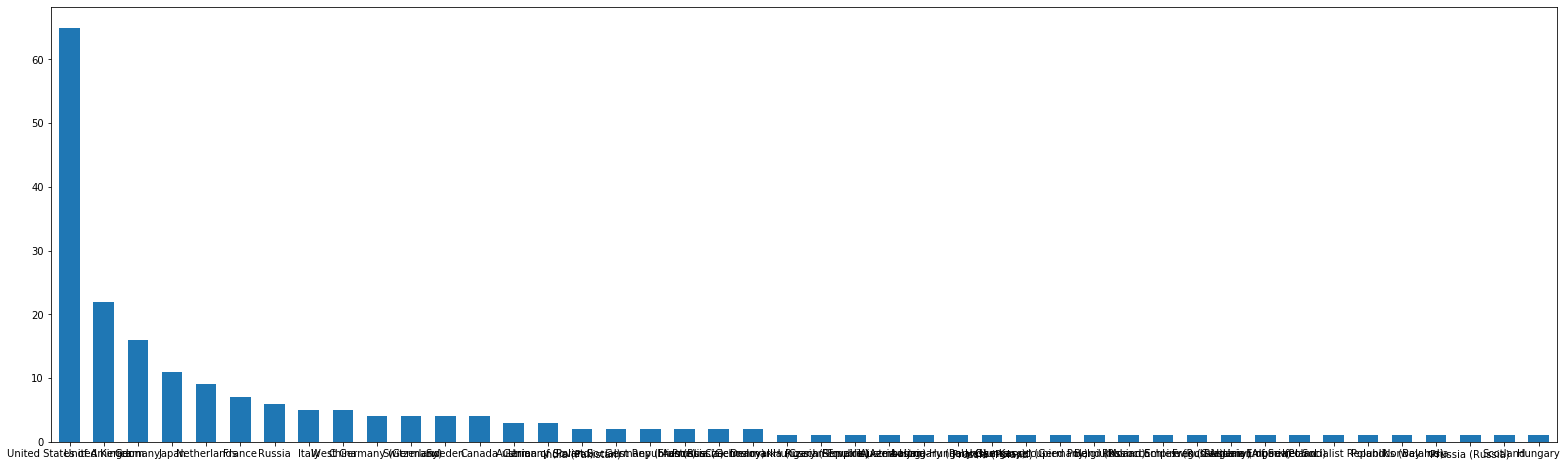

In [46]:
phys = nobel_cleaned.loc[nobel_cleaned['Physics'] == 1]
phys_country = phys['Birth Country'].value_counts()
phys_country.plot.bar(rot=0, figsize=(27,8), width=0.6)

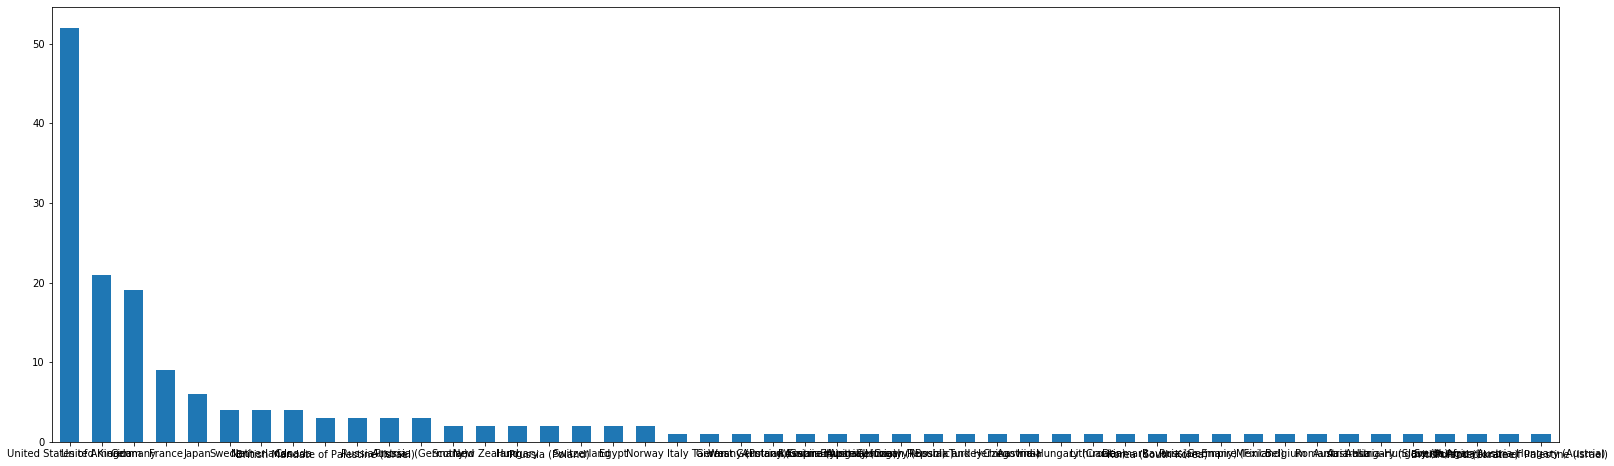

In [47]:
chem = nobel_cleaned.loc[nobel_cleaned['Chemistry'] == 1]
chem_country = chem['Birth Country'].value_counts()
chem_country.plot.bar(rot=0, figsize=(27,8), width=0.6)

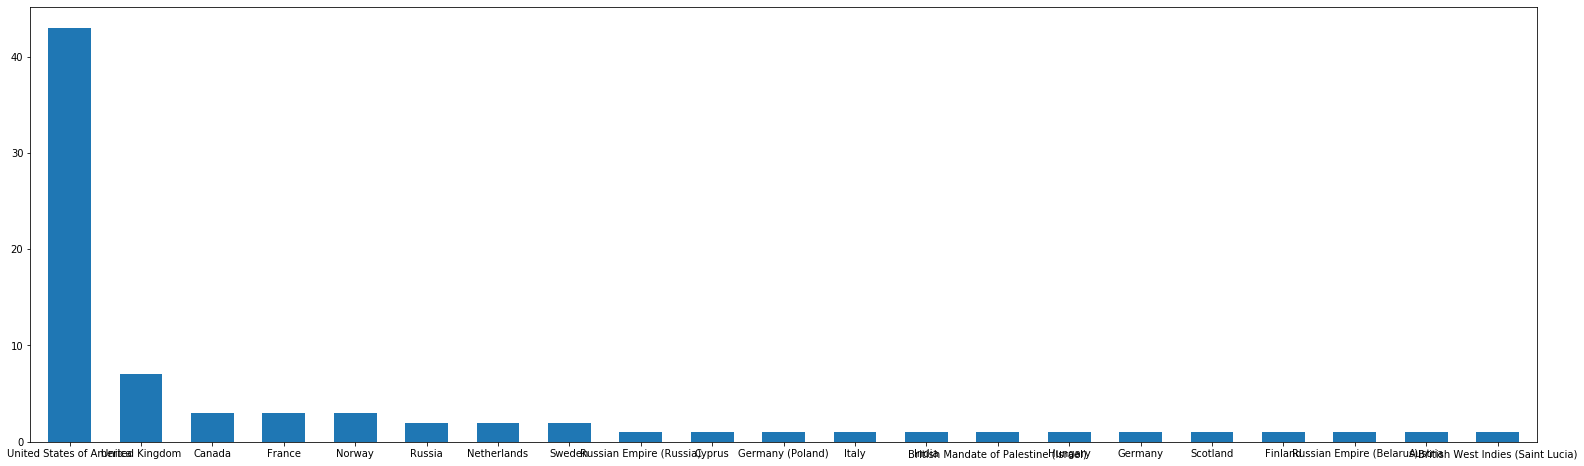

In [48]:
econ = nobel_cleaned.loc[nobel_cleaned['Economics'] == 1]
econ_country = econ['Birth Country'].value_counts()
econ_country.plot.bar(rot=0, figsize=(27,8), width=0.6)

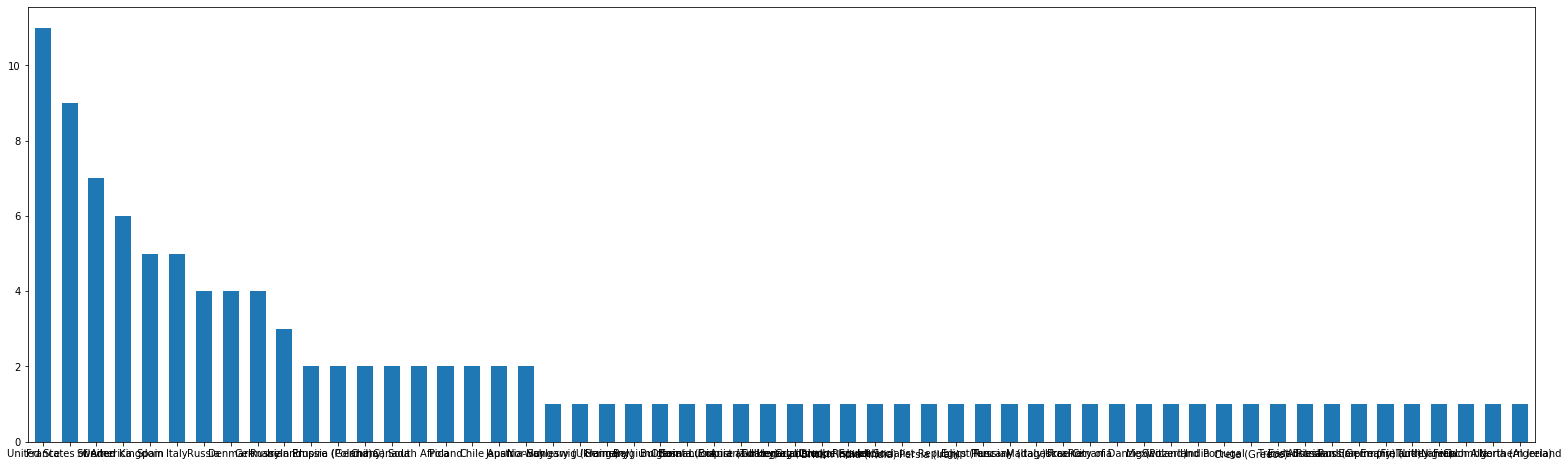

In [49]:
liter = nobel_cleaned.loc[nobel_cleaned['Literature'] == 1]
liter_country = liter['Birth Country'].value_counts()
liter_country.plot.bar(rot=0, figsize=(27,8), width=0.6)

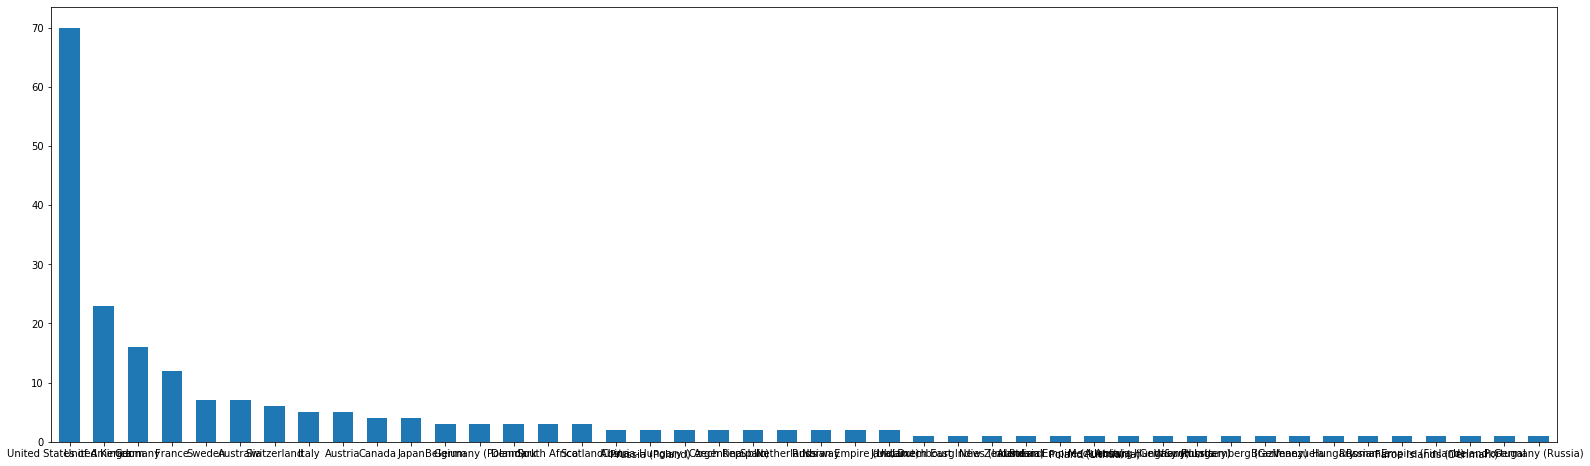

In [50]:
med = nobel_cleaned.loc[nobel_cleaned['Medicine'] == 1]
med_country = med['Birth Country'].value_counts()
med_country.plot.bar(rot=0, figsize=(27,8), width=0.6)

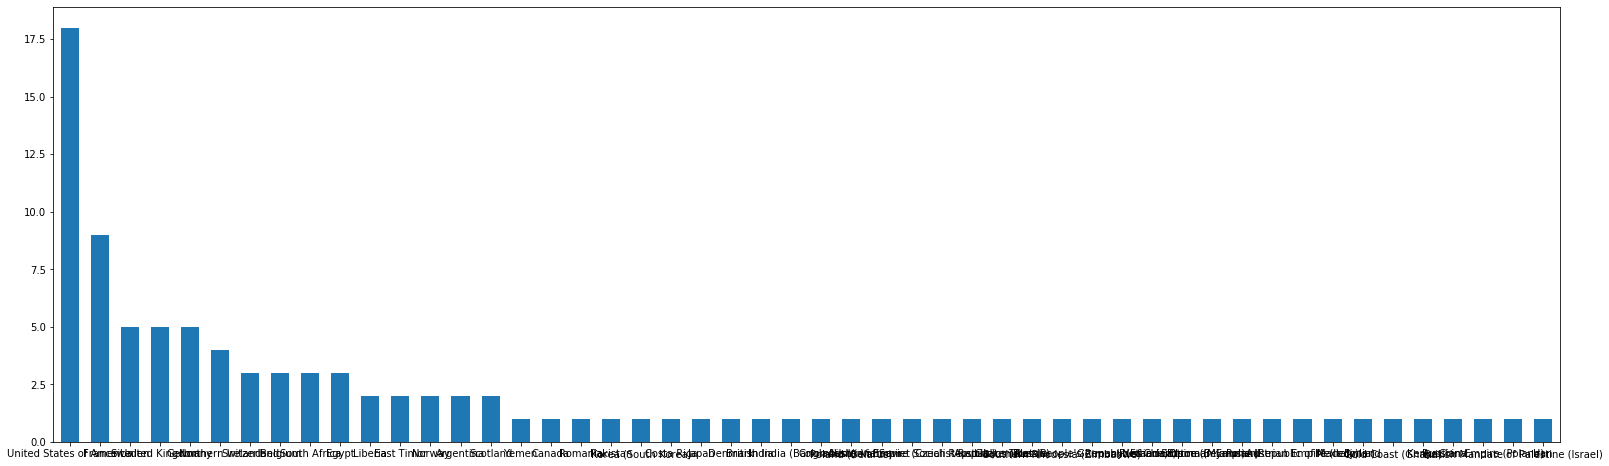

In [51]:
peace = nobel_cleaned.loc[nobel_cleaned['Peace'] == 1]
peace_country = peace['Birth Country'].value_counts()
peace_country.plot.bar(rot=0, figsize=(27,8), width=0.6)

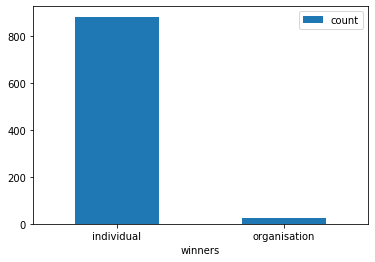

In [52]:
#first we get the individuals and organizations count.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0].count()
org = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 1].count()

ind_count = ind[ind['Laureate Type'] == 0]
org_count = org[org['Laureate Type'] == 1]


#plot the bar chart
df = pd.DataFrame({'winners':['individual', 'organisation'], 'count':[ind_count, org_count]})
df.plot.bar(x='winners', y='count', rot=0)

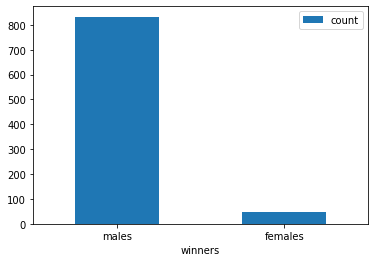

In [53]:
#first we get the individuals.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

#we then get the count of the males and the females
male= ind[ind['Sex'] == 0]
male_count = male['Sex'].count()
female = ind[ind['Sex'] == 1]
female_count = female['Sex'].count()

#plot the bar chart
df = pd.DataFrame({'winners':['males', 'females'], 'count':[male_count, female_count]})
df.plot.bar(x='winners', y='count', rot=0)